In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722').getOrCreate()

In [2]:
df = spark.read.csv('ShanghaiPM20100101_20151231_1.csv',inferSchema=True,header=True)
df1 = spark.read.csv('ShanghaiPM20100101_20151231_2.csv',inferSchema=True,header=True)
df = df.union(df1)

In [3]:
df.printSchema()


root
 |-- No: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- season: integer (nullable = true)
 |-- PM_Jingan: integer (nullable = true)
 |-- PM_US Post: integer (nullable = true)
 |-- PM_Xuhui: integer (nullable = true)
 |-- DEWP: integer (nullable = true)
 |-- HUMI: double (nullable = true)
 |-- PRES: double (nullable = true)
 |-- TEMP: integer (nullable = true)
 |-- cbwd: string (nullable = true)
 |-- Iws: integer (nullable = true)
 |-- precipitation: double (nullable = true)
 |-- Iprec: double (nullable = true)



In [4]:
df.head(5)

[Row(No=1, year=2011, month=12, day=28, hour=18, season=4, PM_Jingan=None, PM_US Post=36, PM_Xuhui=None, DEWP=4, HUMI=62.0, PRES=1027.1, TEMP=11, cbwd='NE', Iws=8, precipitation=0.0, Iprec=0.0),
 Row(No=2, year=2011, month=12, day=28, hour=19, season=4, PM_Jingan=None, PM_US Post=41, PM_Xuhui=None, DEWP=4, HUMI=62.0, PRES=1027.1, TEMP=11, cbwd='NE', Iws=9, precipitation=0.0, Iprec=0.0),
 Row(No=3, year=2011, month=12, day=28, hour=20, season=4, PM_Jingan=None, PM_US Post=44, PM_Xuhui=None, DEWP=5, HUMI=71.07, PRES=1028.1, TEMP=10, cbwd='NE', Iws=11, precipitation=0.0, Iprec=0.0),
 Row(No=4, year=2011, month=12, day=28, hour=21, season=4, PM_Jingan=None, PM_US Post=40, PM_Xuhui=None, DEWP=5, HUMI=71.07, PRES=1028.1, TEMP=10, cbwd='NE', Iws=13, precipitation=0.0, Iprec=0.0),
 Row(No=5, year=2011, month=12, day=28, hour=22, season=4, PM_Jingan=None, PM_US Post=25, PM_Xuhui=None, DEWP=6, HUMI=76.18, PRES=1028.1, TEMP=10, cbwd='NE', Iws=15, precipitation=0.0, Iprec=0.0)]

In [5]:
df.count()

35142

In [6]:
len(df.columns)

17

In [7]:
df.show()

+---+----+-----+---+----+------+---------+----------+--------+----+-----+------+----+----+---+-------------+-----+
| No|year|month|day|hour|season|PM_Jingan|PM_US Post|PM_Xuhui|DEWP| HUMI|  PRES|TEMP|cbwd|Iws|precipitation|Iprec|
+---+----+-----+---+----+------+---------+----------+--------+----+-----+------+----+----+---+-------------+-----+
|  1|2011|   12| 28|  18|     4|     null|        36|    null|   4| 62.0|1027.1|  11|  NE|  8|          0.0|  0.0|
|  2|2011|   12| 28|  19|     4|     null|        41|    null|   4| 62.0|1027.1|  11|  NE|  9|          0.0|  0.0|
|  3|2011|   12| 28|  20|     4|     null|        44|    null|   5|71.07|1028.1|  10|  NE| 11|          0.0|  0.0|
|  4|2011|   12| 28|  21|     4|     null|        40|    null|   5|71.07|1028.1|  10|  NE| 13|          0.0|  0.0|
|  5|2011|   12| 28|  22|     4|     null|        25|    null|   6|76.18|1028.1|  10|  NE| 15|          0.0|  0.0|
|  6|2011|   12| 28|  23|     4|     null|        28|    null|   6|76.18|1028.1|

In [8]:
df.describe('PM_US Post','DEWP','HUMI','PRES','TEMP','Iws').show(5)


+-------+------------------+------------------+------------------+-----------------+-----------------+-----------------+
|summary|        PM_US Post|              DEWP|              HUMI|             PRES|             TEMP|              Iws|
+-------+------------------+------------------+------------------+-----------------+-----------------+-----------------+
|  count|             34039|             35137|             35137|            35122|            35137|            35138|
|   mean| 52.91054378800787|11.444915616017303|  69.8983757862081|1015.887170434479|17.55898340780374|49.43736126131254|
| stddev|42.576137669466505| 9.665202737650802|17.799458742108243|9.012045662790182|9.182527892798946|71.62622054066343|
|    min|                 1|               -17|             13.09|            990.0|               -4|                0|
|    max|               730|                28|             100.0|           1040.0|               41|              691|
+-------+------------------+----

In [9]:
df.columns

['No',
 'year',
 'month',
 'day',
 'hour',
 'season',
 'PM_Jingan',
 'PM_US Post',
 'PM_Xuhui',
 'DEWP',
 'HUMI',
 'PRES',
 'TEMP',
 'cbwd',
 'Iws',
 'precipitation',
 'Iprec']

In [10]:
import pandas as pd

In [11]:
df1 = df.drop('cbwd')

In [12]:
for i in df1.columns:
    print(i,df.corr("PM_US Post",i))

No -0.04669611110342881
year -0.032537489902095706
month -0.060529780066999425
day -0.015305948345123072
hour 0.019143909432299978
season 0.20145953690628093
PM_Jingan 0.6753330941200847
PM_US Post 1.0
PM_Xuhui 0.681945701131505
DEWP -0.32918115104023354
HUMI -0.08158312526939064
PRES 0.11218490414408687
TEMP -0.32325629973284514
Iws -0.1866549243442827
precipitation -0.06967339133635402
Iprec -0.09136592786134123


In [13]:
pm_df = df.toPandas()

In [14]:
import matplotlib.pyplot as plt
plt.hist(pm_df["PM_US Post"].dropna())

(array([2.688e+04, 5.855e+03, 1.036e+03, 2.110e+02, 3.000e+01, 1.400e+01,
        8.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([  1. ,  73.9, 146.8, 219.7, 292.6, 365.5, 438.4, 511.3, 584.2,
        657.1, 730. ]),
 <a list of 10 Patch objects>)

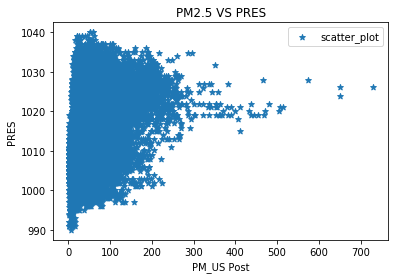

In [15]:
plt.scatter(pm_df["PM_US Post"],pm_df["PRES"],label="scatter_plot",marker="*")
plt.xlabel('PM_US Post')
plt.ylabel('PRES')
plt.title('PM2.5 VS PRES')
plt.legend()

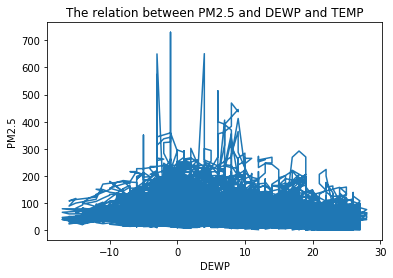

In [16]:
plt.ylabel('PM2.5')
plt.xlabel('DEWP') 
plt.title('The relation between PM2.5 and DEWP and TEMP') 
plt.plot(pm_df["DEWP"],pm_df["PM_US Post"],label = 'DEWP')
#plt.plot(pm_df["TEMP"],pm_df["PM_US Post"],label = 'TEMP')
#plt.legend()
plt.show()

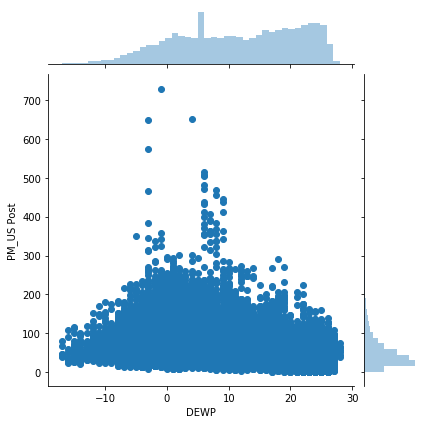

In [17]:
import seaborn as sns
sns.jointplot(x="DEWP", y="PM_US Post", data=pm_df)

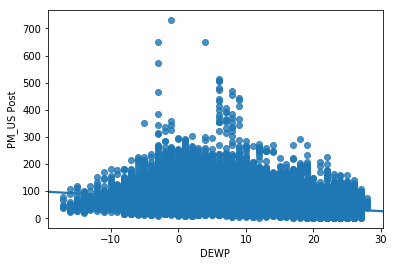

In [18]:
sns.regplot(x="DEWP",y="PM_US Post", data=pm_df,ci=None)

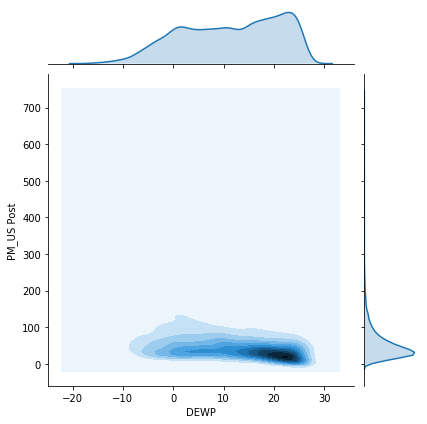

In [19]:
sns.jointplot(x="DEWP", y="PM_US Post", data=pm_df, kind="kde")

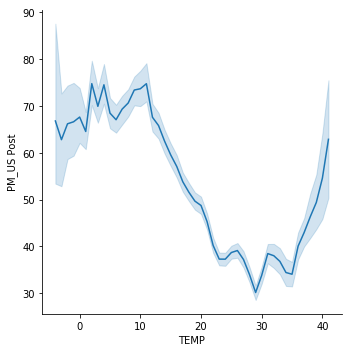

In [20]:
sns.relplot(x="TEMP", y="PM_US Post", kind="line", data=pm_df)

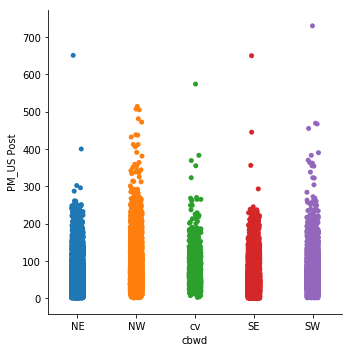

In [21]:
sns.catplot(x="cbwd", y="PM_US Post", data=pm_df)

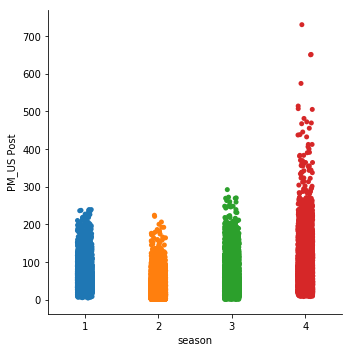

In [22]:
sns.catplot(x="season", y="PM_US Post", data=pm_df)

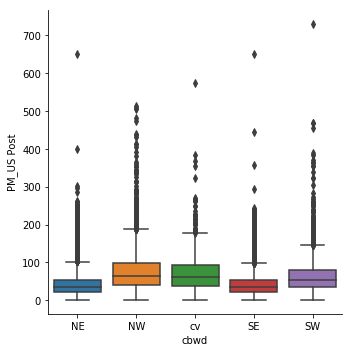

In [23]:
sns.catplot(x="cbwd", y="PM_US Post", kind="box", data=pm_df)

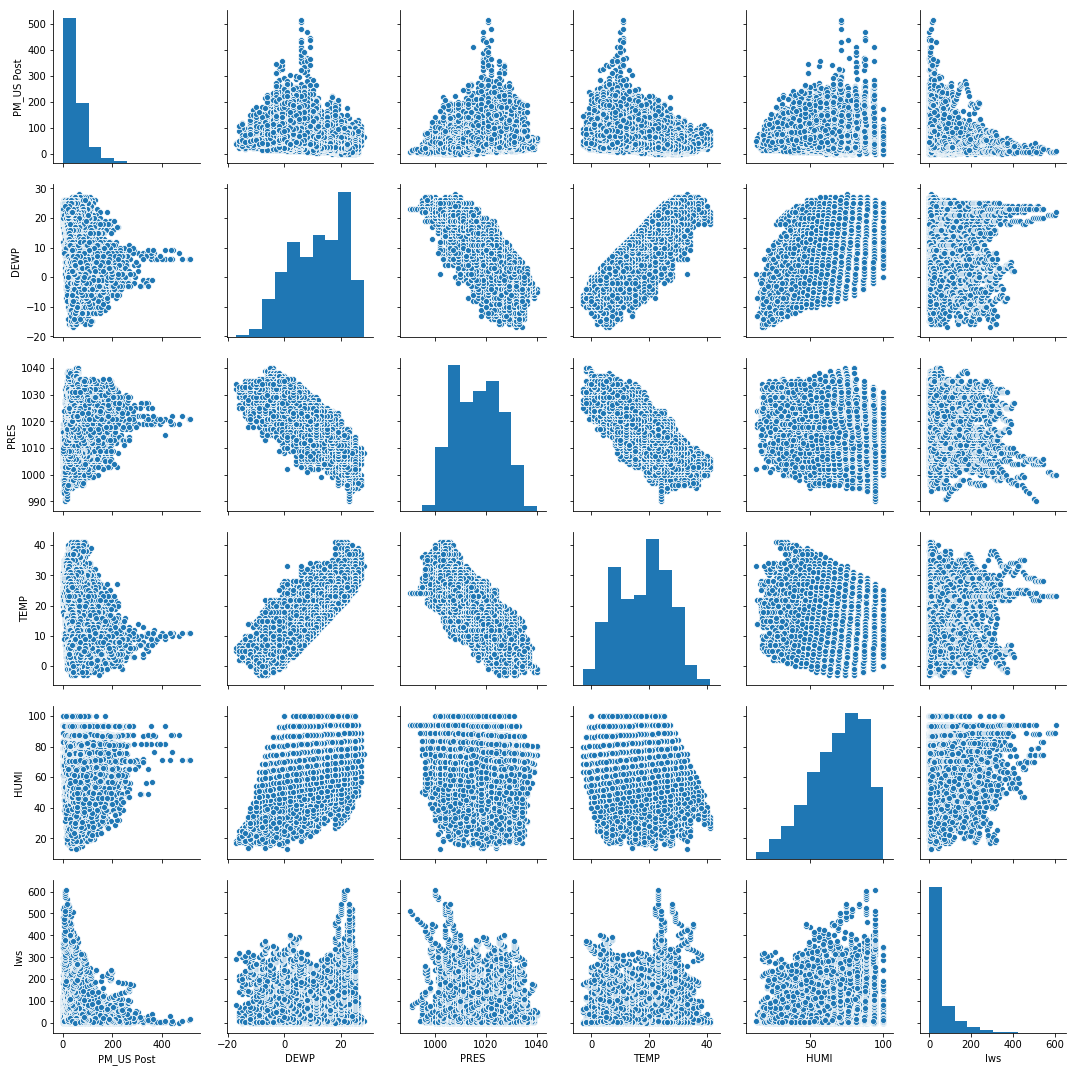

In [24]:
sns.pairplot(pm_df.dropna(), vars=["PM_US Post", "DEWP", "PRES" ,"TEMP", "HUMI", "Iws"])


In [15]:
pm_df.isnull().any() 

No               False
year             False
month            False
day              False
hour             False
season           False
PM_Jingan         True
PM_US Post        True
PM_Xuhui          True
DEWP              True
HUMI              True
PRES              True
TEMP              True
cbwd             False
Iws               True
precipitation     True
Iprec             True
dtype: bool

In [16]:
pm_df.isnull().apply(pd.value_counts)

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
False,35142.0,35142.0,35142.0,35142.0,35142.0,35142.0,24700,34039,25189,35137,35137,35122,35137,35142.0,35138,32870,32870
True,NaN,NaN,NaN,NaN,NaN,NaN,10442,1103,9953,5,5,20,5,NaN,4,2272,2272


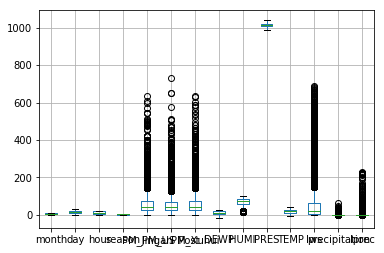

In [17]:
pm_plt = pm_df.copy()
del pm_plt['No']
del pm_plt['year']

plt.figure() 
p=pm_plt.boxplot(return_type='dict') 
x=p['fliers'][0].get_xdata()
y=p['fliers'][0].get_ydata()
y.sort()
for i in range(len(x)):
    if i>0:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.05-0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.08,y[i]))
plt.show()

In [18]:
df = df.drop('PM_Jingan','PM_Xuhui','No')
df.show(10)

+----+-----+---+----+------+----------+----+-----+------+----+----+---+-------------+-----+
|year|month|day|hour|season|PM_US Post|DEWP| HUMI|  PRES|TEMP|cbwd|Iws|precipitation|Iprec|
+----+-----+---+----+------+----------+----+-----+------+----+----+---+-------------+-----+
|2011|   12| 28|  18|     4|        36|   4| 62.0|1027.1|  11|  NE|  8|          0.0|  0.0|
|2011|   12| 28|  19|     4|        41|   4| 62.0|1027.1|  11|  NE|  9|          0.0|  0.0|
|2011|   12| 28|  20|     4|        44|   5|71.07|1028.1|  10|  NE| 11|          0.0|  0.0|
|2011|   12| 28|  21|     4|        40|   5|71.07|1028.1|  10|  NE| 13|          0.0|  0.0|
|2011|   12| 28|  22|     4|        25|   6|76.18|1028.1|  10|  NE| 15|          0.0|  0.0|
|2011|   12| 28|  23|     4|        28|   6|76.18|1028.1|  10|  NE| 17|          0.0|  0.0|
|2011|   12| 29|   0|     4|        34|   6|76.18|1028.1|  10|  NE| 19|          0.0|  0.0|
|2011|   12| 29|   1|     4|        25|   5|76.01|1028.1|   9|  NE| 21|         

In [19]:
from pyspark.sql.functions import mean
na_list = ['PM_US Post','DEWP','HUMI','PRES','TEMP','Iws','precipitation','Iprec']
for i in na_list:
    mean_na = df.select(mean(df[i])).collect()
    mean_na_mean = mean_na[0][0]
    df.fillna(mean_na_mean, subset=[i])
print(df.show(5))

+----+-----+---+----+------+----------+----+-----+------+----+----+---+-------------+-----+
|year|month|day|hour|season|PM_US Post|DEWP| HUMI|  PRES|TEMP|cbwd|Iws|precipitation|Iprec|
+----+-----+---+----+------+----------+----+-----+------+----+----+---+-------------+-----+
|2011|   12| 28|  18|     4|        36|   4| 62.0|1027.1|  11|  NE|  8|          0.0|  0.0|
|2011|   12| 28|  19|     4|        41|   4| 62.0|1027.1|  11|  NE|  9|          0.0|  0.0|
|2011|   12| 28|  20|     4|        44|   5|71.07|1028.1|  10|  NE| 11|          0.0|  0.0|
|2011|   12| 28|  21|     4|        40|   5|71.07|1028.1|  10|  NE| 13|          0.0|  0.0|
|2011|   12| 28|  22|     4|        25|   6|76.18|1028.1|  10|  NE| 15|          0.0|  0.0|
+----+-----+---+----+------+----------+----+-----+------+----+----+---+-------------+-----+
only showing top 5 rows

None


In [20]:
df = df.drop('year','month','day','hour')
df.show(10)

+------+----------+----+-----+------+----+----+---+-------------+-----+
|season|PM_US Post|DEWP| HUMI|  PRES|TEMP|cbwd|Iws|precipitation|Iprec|
+------+----------+----+-----+------+----+----+---+-------------+-----+
|     4|        36|   4| 62.0|1027.1|  11|  NE|  8|          0.0|  0.0|
|     4|        41|   4| 62.0|1027.1|  11|  NE|  9|          0.0|  0.0|
|     4|        44|   5|71.07|1028.1|  10|  NE| 11|          0.0|  0.0|
|     4|        40|   5|71.07|1028.1|  10|  NE| 13|          0.0|  0.0|
|     4|        25|   6|76.18|1028.1|  10|  NE| 15|          0.0|  0.0|
|     4|        28|   6|76.18|1028.1|  10|  NE| 17|          0.0|  0.0|
|     4|        34|   6|76.18|1028.1|  10|  NE| 19|          0.0|  0.0|
|     4|        25|   5|76.01|1028.1|   9|  NE| 21|          0.0|  0.0|
|     4|        27|   5|76.01|1028.1|   9|  NE| 23|          0.0|  0.0|
|     4|        35|   5|81.34|1028.1|   8|  NE| 25|          0.0|  0.0|
+------+----------+----+-----+------+----+----+---+-------------

In [21]:
del pm_df['PM_Jingan']
del pm_df['PM_Xuhui']
del pm_df['No']
pm_df.head()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2011,12,28,18,4,36.0,4.0,62.00,1027.1,11.0,NE,8.0,0.0,0.0
1,2011,12,28,19,4,41.0,4.0,62.00,1027.1,11.0,NE,9.0,0.0,0.0
2,2011,12,28,20,4,44.0,5.0,71.07,1028.1,10.0,NE,11.0,0.0,0.0
3,2011,12,28,21,4,40.0,5.0,71.07,1028.1,10.0,NE,13.0,0.0,0.0
4,2011,12,28,22,4,25.0,6.0,76.18,1028.1,10.0,NE,15.0,0.0,0.0


In [22]:
mean=pm_df.mean()
pm_df.fillna(mean, inplace=True)
pm_df.isnull().apply(pd.value_counts)

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
False,35142,35142,35142,35142,35142,35142,35142,35142,35142,35142,35142,35142,35142,35142


In [23]:
periods = pd.PeriodIndex(year=pm_df["year"], month=pm_df["month"], day=pm_df["day"] ,freq="D")

pm_df = pm_df.set_index(periods)

pm_df.head()


,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
2011-12-28,2011,12,28,18,4,36.0,4.0,62.00,1027.1,11.0,NE,8.0,0.0,0.0
2011-12-28,2011,12,28,19,4,41.0,4.0,62.00,1027.1,11.0,NE,9.0,0.0,0.0
2011-12-28,2011,12,28,20,4,44.0,5.0,71.07,1028.1,10.0,NE,11.0,0.0,0.0
2011-12-28,2011,12,28,21,4,40.0,5.0,71.07,1028.1,10.0,NE,13.0,0.0,0.0
2011-12-28,2011,12,28,22,4,25.0,6.0,76.18,1028.1,10.0,NE,15.0,0.0,0.0


In [24]:
import numpy as np
pm_df['day_or_night'] = np.where((pm_df['hour']>=6) & (pm_df['hour']<=18),1,0)
pm_df.head(10)

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,day_or_night
2011-12-28,2011,12,28,18,4,36.0,4.0,62.00,1027.1,11.0,NE,8.0,0.0,0.0,1
2011-12-28,2011,12,28,19,4,41.0,4.0,62.00,1027.1,11.0,NE,9.0,0.0,0.0,0
2011-12-28,2011,12,28,20,4,44.0,5.0,71.07,1028.1,10.0,NE,11.0,0.0,0.0,0
2011-12-28,2011,12,28,21,4,40.0,5.0,71.07,1028.1,10.0,NE,13.0,0.0,0.0,0
2011-12-28,2011,12,28,22,4,25.0,6.0,76.18,1028.1,10.0,NE,15.0,0.0,0.0,0
2011-12-28,2011,12,28,23,4,28.0,6.0,76.18,1028.1,10.0,NE,17.0,0.0,0.0,0
2011-12-29,2011,12,29,0,4,34.0,6.0,76.18,1028.1,10.0,NE,19.0,0.0,0.0,0
2011-12-29,2011,12,29,1,4,25.0,5.0,76.01,1028.1,9.0,NE,21.0,0.0,0.0,0
2011-12-29,2011,12,29,2,4,27.0,5.0,76.01,1028.1,9.0,NE,23.0,0.0,0.0,0
2011-12-29,2011,12,29,3,4,35.0,5.0,81.34,1028.1,8.0,NE,25.0,0.0,0.0,0


In [25]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
pm_df['cbwd'] = le.fit_transform(pm_df['cbwd'])
pm_df.head(10)

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,day_or_night
2011-12-28,2011,12,28,18,4,36.0,4.0,62.00,1027.1,11.0,0,8.0,0.0,0.0,1
2011-12-28,2011,12,28,19,4,41.0,4.0,62.00,1027.1,11.0,0,9.0,0.0,0.0,0
2011-12-28,2011,12,28,20,4,44.0,5.0,71.07,1028.1,10.0,0,11.0,0.0,0.0,0
2011-12-28,2011,12,28,21,4,40.0,5.0,71.07,1028.1,10.0,0,13.0,0.0,0.0,0
2011-12-28,2011,12,28,22,4,25.0,6.0,76.18,1028.1,10.0,0,15.0,0.0,0.0,0
2011-12-28,2011,12,28,23,4,28.0,6.0,76.18,1028.1,10.0,0,17.0,0.0,0.0,0
2011-12-29,2011,12,29,0,4,34.0,6.0,76.18,1028.1,10.0,0,19.0,0.0,0.0,0
2011-12-29,2011,12,29,1,4,25.0,5.0,76.01,1028.1,9.0,0,21.0,0.0,0.0,0
2011-12-29,2011,12,29,2,4,27.0,5.0,76.01,1028.1,9.0,0,23.0,0.0,0.0,0
2011-12-29,2011,12,29,3,4,35.0,5.0,81.34,1028.1,8.0,0,25.0,0.0,0.0,0


In [26]:
encoded_value = le.fit_transform(["cv", "NE", "NW", "SE","SW"])
print(encoded_value)

[4 0 1 2 3]


In [27]:
Q1 = pm_df.quantile(0.25)
Q3 = pm_df.quantile(0.75)
IQR = Q3 - Q1
pm_df = pm_df[~((pm_df < (Q1 - 1.5 * IQR)) |(pm_df > (Q3 + 1.5 * IQR))).any(axis=1)]
pm_df.shape

(24535, 15)

In [28]:
del pm_df['year']
del pm_df['month']
del pm_df['day']
del pm_df['hour']
pm_df.head(10)

,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,day_or_night
2011-12-28,4,36.0,4.0,62.00,1027.1,11.0,0,8.0,0.0,0.0,1
2011-12-28,4,41.0,4.0,62.00,1027.1,11.0,0,9.0,0.0,0.0,0
2011-12-28,4,44.0,5.0,71.07,1028.1,10.0,0,11.0,0.0,0.0,0
2011-12-28,4,40.0,5.0,71.07,1028.1,10.0,0,13.0,0.0,0.0,0
2011-12-28,4,25.0,6.0,76.18,1028.1,10.0,0,15.0,0.0,0.0,0
2011-12-28,4,28.0,6.0,76.18,1028.1,10.0,0,17.0,0.0,0.0,0
2011-12-29,4,34.0,6.0,76.18,1028.1,10.0,0,19.0,0.0,0.0,0
2011-12-29,4,25.0,5.0,76.01,1028.1,9.0,0,21.0,0.0,0.0,0
2011-12-29,4,27.0,5.0,76.01,1028.1,9.0,0,23.0,0.0,0.0,0
2011-12-29,4,35.0,5.0,81.34,1028.1,8.0,0,25.0,0.0,0.0,0


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00769577 0.11388942 0.14100129 0.21746248 0.1171176  0.04327755
 0.34797012 0.         0.         0.01158577]


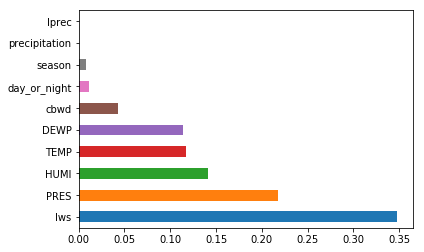

In [29]:
le = preprocessing.LabelEncoder()
pm_df["PM_US Post"]=le.fit_transform(pm_df["PM_US Post"])# transfer continous to intger
columns = pm_df.columns

x = pm_df[[c for c in columns if c not in ["PM_US Post"]]]  #independent columns
y = pm_df.iloc[:,1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [30]:
pm_df_reduced=pm_df[[c for c in columns if c not in ["season","day_or_night","Iprec","precipitation"]]]
pm_df_reduced.head(10)

,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws
2011-12-28,35,4.0,62.00,1027.1,11.0,0,8.0
2011-12-28,40,4.0,62.00,1027.1,11.0,0,9.0
2011-12-28,43,5.0,71.07,1028.1,10.0,0,11.0
2011-12-28,39,5.0,71.07,1028.1,10.0,0,13.0
2011-12-28,24,6.0,76.18,1028.1,10.0,0,15.0
2011-12-28,27,6.0,76.18,1028.1,10.0,0,17.0
2011-12-29,33,6.0,76.18,1028.1,10.0,0,19.0
2011-12-29,24,5.0,76.01,1028.1,9.0,0,21.0
2011-12-29,26,5.0,76.01,1028.1,9.0,0,23.0
2011-12-29,34,5.0,81.34,1028.1,8.0,0,25.0


In [31]:
import numpy as np
pm_df_reduced = pm_df_reduced[pm_df_reduced["PM_US Post"] != 0] #remove 0 value in order to use log function
pm_df_reduced['PM_US Post']=np.log(pm_df_reduced['PM_US Post']) # log it
pm_df_reduced.head(10)


,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws
2011-12-28,3.555348,4.0,62.00,1027.1,11.0,0,8.0
2011-12-28,3.688879,4.0,62.00,1027.1,11.0,0,9.0
2011-12-28,3.761200,5.0,71.07,1028.1,10.0,0,11.0
2011-12-28,3.663562,5.0,71.07,1028.1,10.0,0,13.0
2011-12-28,3.178054,6.0,76.18,1028.1,10.0,0,15.0
2011-12-28,3.295837,6.0,76.18,1028.1,10.0,0,17.0
2011-12-29,3.496508,6.0,76.18,1028.1,10.0,0,19.0
2011-12-29,3.178054,5.0,76.01,1028.1,9.0,0,21.0
2011-12-29,3.258097,5.0,76.01,1028.1,9.0,0,23.0
2011-12-29,3.526361,5.0,81.34,1028.1,8.0,0,25.0


In [32]:
pm_df_final = pm_df_reduced

In [33]:
pm_df_final.shape

(24457, 7)

In [34]:
sns.set_style('darkgrid')
sns.distplot(pm_df_final['PM_US Post'])

NameError: name 'sns' is not defined

In [35]:
#Linear regression model
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL Hive integration example") \
        .enableHiveSupport() \
        .getOrCreate()
sparkDF = spark.createDataFrame(pm_df_final)
sparkDF.show()

+------------------+----+-----+------+----+----+----+
|        PM_US Post|DEWP| HUMI|  PRES|TEMP|cbwd| Iws|
+------------------+----+-----+------+----+----+----+
|3.5553480614894135| 4.0| 62.0|1027.1|11.0|   0| 8.0|
|3.6888794541139363| 4.0| 62.0|1027.1|11.0|   0| 9.0|
|3.7612001156935624| 5.0|71.07|1028.1|10.0|   0|11.0|
|3.6635616461296463| 5.0|71.07|1028.1|10.0|   0|13.0|
|3.1780538303479458| 6.0|76.18|1028.1|10.0|   0|15.0|
| 3.295836866004329| 6.0|76.18|1028.1|10.0|   0|17.0|
|3.4965075614664802| 6.0|76.18|1028.1|10.0|   0|19.0|
|3.1780538303479458| 5.0|76.01|1028.1| 9.0|   0|21.0|
| 3.258096538021482| 5.0|76.01|1028.1| 9.0|   0|23.0|
|3.5263605246161616| 5.0|81.34|1028.1| 8.0|   0|25.0|
|3.4657359027997265| 5.0|81.34|1027.1| 8.0|   0|29.0|
|3.4965075614664802| 4.0|70.88|1028.1| 9.0|   0|34.0|
|3.5553480614894135| 4.0|70.88|1028.1| 9.0|   0|37.0|
|3.6635616461296463| 4.0|70.88|1029.1| 9.0|   0|40.0|
|3.6888794541139363| 4.0|70.88|1030.1| 9.0|   0|44.0|
|3.6635616461296463| 4.0|66.

In [46]:
sparkDF.printSchema()

root
 |-- PM_US Post: double (nullable = true)
 |-- DEWP: double (nullable = true)
 |-- HUMI: double (nullable = true)
 |-- PRES: double (nullable = true)
 |-- TEMP: double (nullable = true)
 |-- cbwd: long (nullable = true)
 |-- Iws: double (nullable = true)



In [47]:
sparkDF.show()

+------------------+----+-----+------+----+----+----+
|        PM_US Post|DEWP| HUMI|  PRES|TEMP|cbwd| Iws|
+------------------+----+-----+------+----+----+----+
|3.5553480614894135| 4.0| 62.0|1027.1|11.0|   0| 8.0|
|3.6888794541139363| 4.0| 62.0|1027.1|11.0|   0| 9.0|
|3.7612001156935624| 5.0|71.07|1028.1|10.0|   0|11.0|
|3.6635616461296463| 5.0|71.07|1028.1|10.0|   0|13.0|
|3.1780538303479458| 6.0|76.18|1028.1|10.0|   0|15.0|
| 3.295836866004329| 6.0|76.18|1028.1|10.0|   0|17.0|
|3.4965075614664802| 6.0|76.18|1028.1|10.0|   0|19.0|
|3.1780538303479458| 5.0|76.01|1028.1| 9.0|   0|21.0|
| 3.258096538021482| 5.0|76.01|1028.1| 9.0|   0|23.0|
|3.5263605246161616| 5.0|81.34|1028.1| 8.0|   0|25.0|
|3.4657359027997265| 5.0|81.34|1027.1| 8.0|   0|29.0|
|3.4965075614664802| 4.0|70.88|1028.1| 9.0|   0|34.0|
|3.5553480614894135| 4.0|70.88|1028.1| 9.0|   0|37.0|
|3.6635616461296463| 4.0|70.88|1029.1| 9.0|   0|40.0|
|3.6888794541139363| 4.0|70.88|1030.1| 9.0|   0|44.0|
|3.6635616461296463| 4.0|66.

In [97]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=["DEWP", "HUMI", 
               "PRES","TEMP","cbwd","Iws"],
    outputCol="features")

In [98]:
output = assembler.transform(sparkDF)

In [99]:
output.printSchema()
output.head(1)

root
 |-- PM_US Post: double (nullable = true)
 |-- DEWP: double (nullable = true)
 |-- HUMI: double (nullable = true)
 |-- PRES: double (nullable = true)
 |-- TEMP: double (nullable = true)
 |-- cbwd: long (nullable = true)
 |-- Iws: double (nullable = true)
 |-- features: vector (nullable = true)



[Row(PM_US Post=3.5553480614894135, DEWP=4.0, HUMI=62.0, PRES=1027.1, TEMP=11.0, cbwd=0, Iws=8.0, features=DenseVector([4.0, 62.0, 1027.1, 11.0, 0.0, 8.0]))]

In [100]:
final_data = output.select("features",'PM_US Post')
final_data.show()

+--------------------+------------------+
|            features|        PM_US Post|
+--------------------+------------------+
|[4.0,62.0,1027.1,...|3.5553480614894135|
|[4.0,62.0,1027.1,...|3.6888794541139363|
|[5.0,71.07,1028.1...|3.7612001156935624|
|[5.0,71.07,1028.1...|3.6635616461296463|
|[6.0,76.18,1028.1...|3.1780538303479458|
|[6.0,76.18,1028.1...| 3.295836866004329|
|[6.0,76.18,1028.1...|3.4965075614664802|
|[5.0,76.01,1028.1...|3.1780538303479458|
|[5.0,76.01,1028.1...| 3.258096538021482|
|[5.0,81.34,1028.1...|3.5263605246161616|
|[5.0,81.34,1027.1...|3.4657359027997265|
|[4.0,70.88,1028.1...|3.4965075614664802|
|[4.0,70.88,1028.1...|3.5553480614894135|
|[4.0,70.88,1029.1...|3.6635616461296463|
|[4.0,70.88,1030.1...|3.6888794541139363|
|[4.0,66.27,1030.1...|3.6635616461296463|
|[4.0,62.0,1030.1,...|3.6635616461296463|
|[3.0,57.77,1030.1...|3.9512437185814275|
|[3.0,57.77,1030.1...|3.6109179126442243|
|[1.0,50.08,1029.1...| 3.367295829986474|
+--------------------+------------

In [101]:
train_data,test_data = final_data.randomSplit([0.8,0.2])

In [102]:
# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+------------------+
|summary|        PM_US Post|
+-------+------------------+
|  count|             19414|
|   mean|3.6533322344170913|
| stddev|0.7002578077552207|
|    min|               0.0|
|    max| 4.812184355372417|
+-------+------------------+

+-------+------------------+
|summary|        PM_US Post|
+-------+------------------+
|  count|              5043|
|   mean| 3.664317226496389|
| stddev|0.7054099584176626|
|    min|               0.0|
|    max| 4.812184355372417|
+-------+------------------+



In [103]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol='PM_US Post')

In [104]:
lrModel = lr.fit(train_data)

In [105]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [-0.054167865420257935,0.006248796417411199,-0.017974383704227295,0.009849619273843611,0.05779797787540777,-0.003019300950576051] Intercept: 21.955691277289997


In [106]:
test_results = lrModel.evaluate(test_data)

In [107]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

+--------------------+
|           residuals|
+--------------------+
|  -0.625601274315915|
|  -0.895633434212654|
| 0.42915555234054725|
|-0.00475531606303...|
| 0.10340251530529088|
| -0.2839180762436806|
|-0.48723044893394185|
|-0.03869427482222...|
| -0.6801518875869887|
|-0.20030210567404882|
|-0.04991251674792263|
|-0.07756591353384845|
| -0.5603161018104719|
| -0.5705305200553221|
| 0.06423504179585837|
|  0.2500812604110898|
|   0.315591626056678|
| -0.4569677059431907|
|-0.16447378788259392|
|-0.16044886577424133|
+--------------------+
only showing top 20 rows

RSME: 0.6362641511075926


In [108]:
print("R2: {}".format(test_results.r2))

R2: 0.18627461746861274


In [109]:
final_data.describe().show()

+-------+------------------+
|summary|        PM_US Post|
+-------+------------------+
|  count|             24457|
|   mean|3.6555973247820748|
| stddev|0.7013228913475041|
|    min|               0.0|
|    max| 4.812184355372417|
+-------+------------------+



In [110]:
predictions = lrModel.transform(test_data)

In [111]:
predictions.select("features","PM_US Post","prediction").show(5)

+--------------------+------------------+------------------+
|            features|        PM_US Post|        prediction|
+--------------------+------------------+------------------+
|[-16.0,24.89,1030...|3.4965075614664802| 4.122108835782395|
|[-15.0,27.05,1029...|3.2188758248682006|4.1145092590808545|
|[-14.0,25.49,1027...|  4.61512051684126| 4.185964964500712|
|[-13.0,22.46,1023...|4.2626798770413155| 4.267435193104351|
|[-13.0,22.46,1024...| 4.343805421853684| 4.240402906548393|
+--------------------+------------------+------------------+
only showing top 5 rows



In [112]:
residuals = test_results.residuals.toPandas()

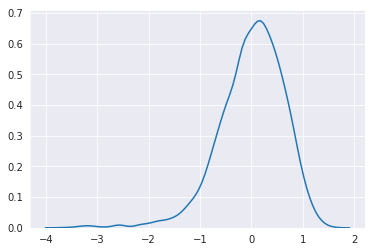

In [113]:
sns.distplot(residuals,hist = False)

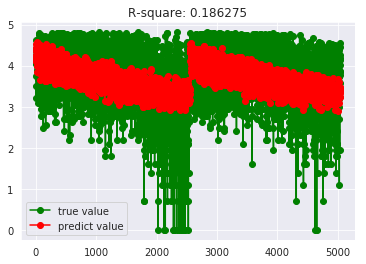

In [114]:
import matplotlib.pyplot as plt
df_pre = predictions.toPandas()
preds = df_pre['prediction']
test_target = df_pre['PM_US Post']
plt.figure()
plt.plot(np.arange(len(preds)), test_target,'go-',label='true value')
plt.plot(np.arange(len(preds)),preds,'ro-',label='predict value')
plt.title('R-square: %f'%test_results.r2)
plt.legend()
plt.show()

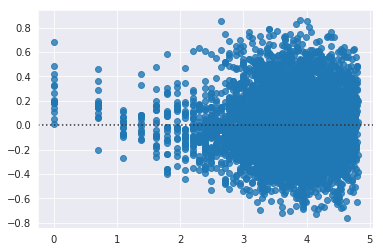

In [115]:
y_true = predictions.select("PM_US Post").toPandas()
y_pred = predictions.select("prediction").toPandas()

sns.residplot(y_true,y_pred)


In [116]:
#Random Forest Model
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline

In [117]:
rf = RandomForestRegressor(labelCol='PM_US Post',numTrees=10,maxDepth=10)

rfModel = rf.fit(train_data)

In [118]:
rfModel.featureImportances

SparseVector(6, {0: 0.2637, 1: 0.0883, 2: 0.1483, 3: 0.2039, 4: 0.133, 5: 0.1628})

In [119]:
predictions_rf = rfModel.transform(test_data)

In [120]:
predictions_rf.select("features","PM_US Post", "prediction").show(5)

+--------------------+------------------+------------------+
|            features|        PM_US Post|        prediction|
+--------------------+------------------+------------------+
|[-16.0,24.89,1030...|3.4965075614664802| 3.787072398947404|
|[-15.0,27.05,1029...|3.2188758248682006|3.7981926601604825|
|[-14.0,25.49,1027...|  4.61512051684126| 4.104501572189478|
|[-13.0,22.46,1023...|4.2626798770413155|4.1412039262038185|
|[-13.0,22.46,1024...| 4.343805421853684| 4.181461514059427|
+--------------------+------------------+------------------+
only showing top 5 rows



In [121]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(
labelCol="PM_US Post", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_rf)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.560558


In [122]:
import sklearn.metrics
result_rf = predictions_rf.toPandas()
y_pred_rf = result_rf['prediction']
y_true_rf = result_rf['PM_US Post']
r2_score = sklearn.metrics.r2_score(y_true_rf, y_pred_rf)
print('r2_score: {:4.3f}'.format(r2_score))

r2_score: 0.368


In [123]:
train_data.select("features").show(5)
rfModel.featureImportances

+--------------------+
|            features|
+--------------------+
|[-15.0,23.48,1030...|
|[-15.0,27.05,1032...|
|[-14.0,23.77,1025...|
|[-14.0,23.77,1028...|
|[-14.0,27.36,1029...|
+--------------------+
only showing top 5 rows



SparseVector(6, {0: 0.2637, 1: 0.0883, 2: 0.1483, 3: 0.2039, 4: 0.133, 5: 0.1628})

Text(0.5,1,'Feature Importance')

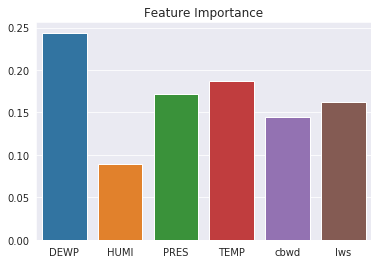

In [124]:
features=['DEWP','HUMI','PRES','TEMP','cbwd','Iws']
importance=[0.2439,0.0897,0.1717,0.1873,0.1451,0.1623]
ax = sns.barplot(x=features, y=importance)
ax.set_title('Feature Importance')

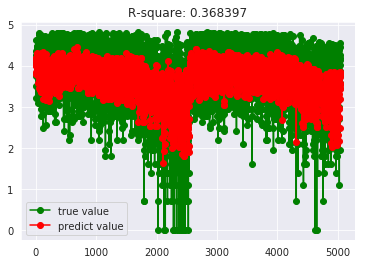

In [125]:
import matplotlib.pyplot as plt
df_pre_rf = predictions_rf.toPandas()
preds = df_pre_rf['prediction']
test_target = df_pre_rf['PM_US Post']
plt.figure()
plt.plot(np.arange(len(preds)), test_target,'go-',label='true value')
plt.plot(np.arange(len(preds)),preds,'ro-',label='predict value')
plt.title('R-square: %f'%r2_score)
plt.legend()
plt.show()

Text(0.5,1,'Residual value of model')

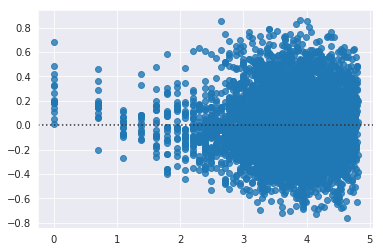

In [126]:
y_true_rf = predictions_rf.select("PM_US Post").toPandas()
y_pred_rf = predictions_rf.select("prediction").toPandas()

sns.residplot(y_true,y_pred)
ax.set_title('Residual value of model')

In [127]:
#Gradient-boosted tree regression
from pyspark.ml.regression import GBTRegressor
GBTR = GBTRegressor(labelCol='PM_US Post')

In [128]:
GBTRModel = GBTR.fit(train_data)

In [129]:
predictions_GBTR = GBTRModel.transform(test_data)
predictions_GBTR.select("features","PM_US Post", "prediction").show(5)

+--------------------+------------------+-----------------+
|            features|        PM_US Post|       prediction|
+--------------------+------------------+-----------------+
|[-16.0,24.89,1030...|3.4965075614664802|3.981986307647946|
|[-15.0,27.05,1029...|3.2188758248682006|3.981986307647946|
|[-14.0,25.49,1027...|  4.61512051684126|4.146034434123317|
|[-13.0,22.46,1023...|4.2626798770413155|4.155545216301757|
|[-13.0,22.46,1024...| 4.343805421853684|4.148675336807118|
+--------------------+------------------+-----------------+
only showing top 5 rows



In [130]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(
labelCol="PM_US Post", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_GBTR)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.578895


In [131]:
import sklearn.metrics
result_rf = predictions_GBTR.toPandas()
y_pred_rf = result_rf['prediction']
y_true_rf = result_rf['PM_US Post']
r2_score = sklearn.metrics.r2_score(y_true_rf, y_pred_rf)
print('r2_score: {:4.3f}'.format(r2_score))

r2_score: 0.326


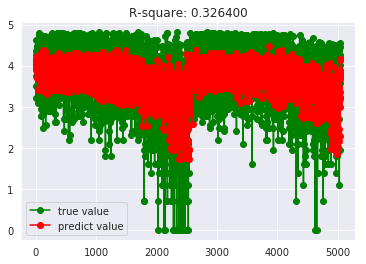

In [132]:
import matplotlib.pyplot as plt
df_pre_GBTR = predictions_GBTR.toPandas()
preds_GBTR = df_pre_GBTR['prediction']
test_target_GBTR = df_pre_GBTR['PM_US Post']
plt.figure()
plt.plot(np.arange(len(preds)),test_target_GBTR,'go-',label='true value')
plt.plot(np.arange(len(preds)),preds_GBTR,'ro-',label='predict value')
plt.title('R-square: %f'%r2_score)
plt.legend()
plt.show()

Text(0.5,1,'Residual value of model')

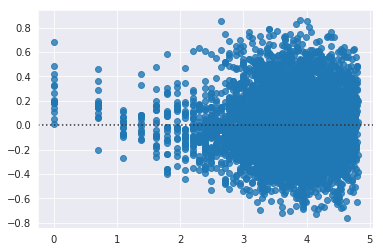

In [133]:
y_true_rf = predictions_GBTR.select("PM_US Post").toPandas()
y_pred_rf = predictions_GBTR.select("prediction").toPandas()

sns.residplot(y_true,y_pred)
ax.set_title('Residual value of model')

In [117]:
#KNN
from sklearn.model_selection import train_test_split
columnss = pm_df_final.columns
input_data=pm_df_final[[c for c in columnss if c not in ['PM_US Post']]]
target=pm_df_final['PM_US Post']
train_input, test_input,train_target,test_target = train_test_split(input_data,target, test_size = 0.20, random_state = 10)

In [118]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
knn = neighbors.KNeighborsRegressor()
knn.fit(train_input,train_target)
preds = knn.predict(test_input)
RMSE = sqrt(mean_squared_error(preds,test_target))
print("Root Mean Squared Error (RMSE) on test data = %g" % RMSE)

Root Mean Squared Error (RMSE) on test data = 0.621425


In [119]:
score_knn=knn.score(test_input,test_target)
print('r2_score: {:4.4f}'.format(score_knn))

r2_score: 0.1796


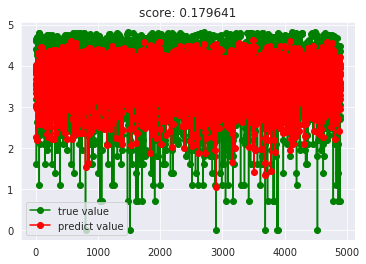

In [120]:
plt.figure()
plt.plot(np.arange(len(preds)), test_target,'go-',label='true value')
plt.plot(np.arange(len(preds)),preds,'ro-',label='predict value')
plt.title('score: %f'%score_knn)
plt.legend()
plt.show()

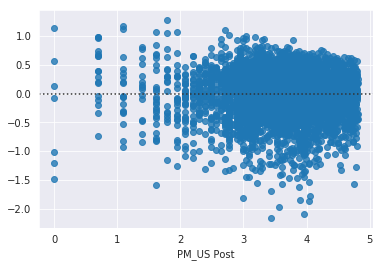

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy

sns.residplot(test_target, preds)

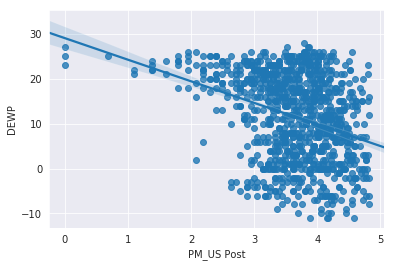

In [122]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

dfSample = pm_df_final.sample(1000)

sns.set_style('darkgrid')
sns.regplot(x="PM_US Post", y="DEWP", data=dfSample);

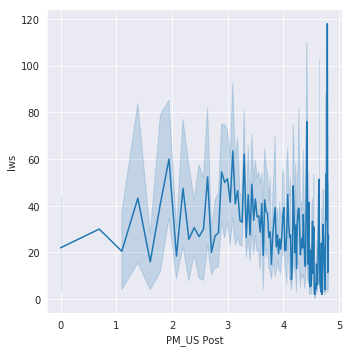

In [123]:
sns.relplot(x="PM_US Post", y="Iws",kind="line", data=dfSample)

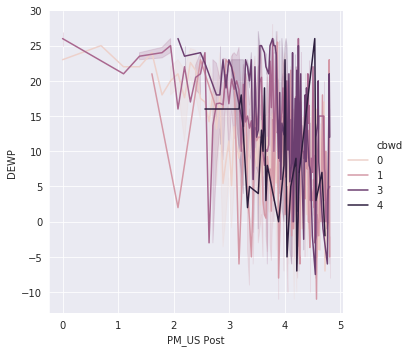

In [124]:
sns.relplot(x="PM_US Post", y="DEWP", hue="cbwd", kind="line", data=dfSample)

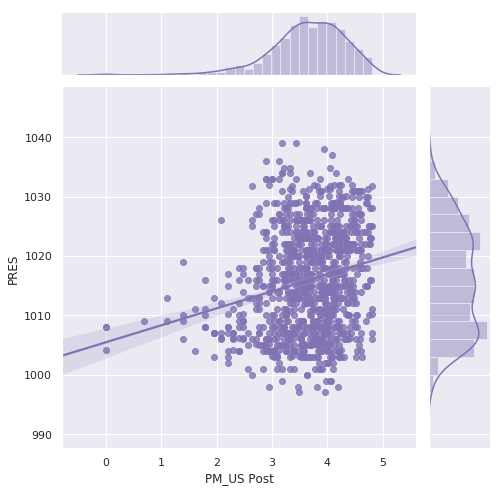

In [125]:
sns.set(style="darkgrid")

g = sns.jointplot("PM_US Post", "PRES", data=dfSample, kind="reg",color="m", height=7)

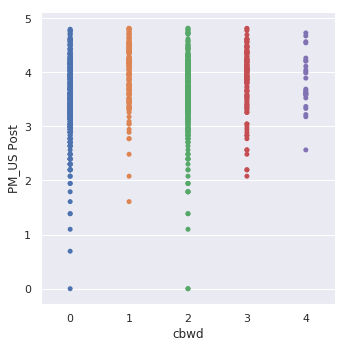

In [126]:
sns.catplot(x="cbwd", y="PM_US Post", jitter = False,data=dfSample)

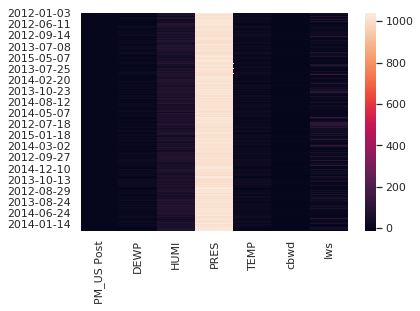

In [127]:
sns.heatmap(dfSample)

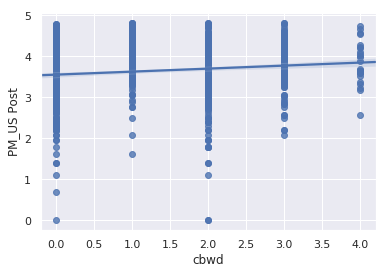

In [128]:
sns.regplot(x="cbwd", y="PM_US Post", data=dfSample)

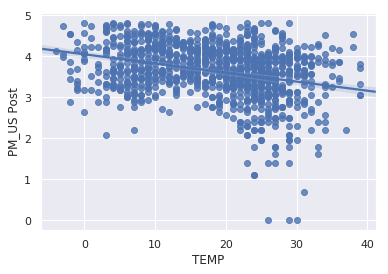

In [129]:
sns.regplot(x="TEMP", y="PM_US Post", data=dfSample)

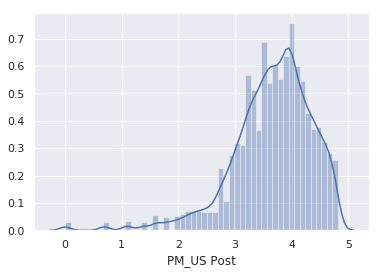

In [130]:
sns.distplot(pm_df_final["PM_US Post"])

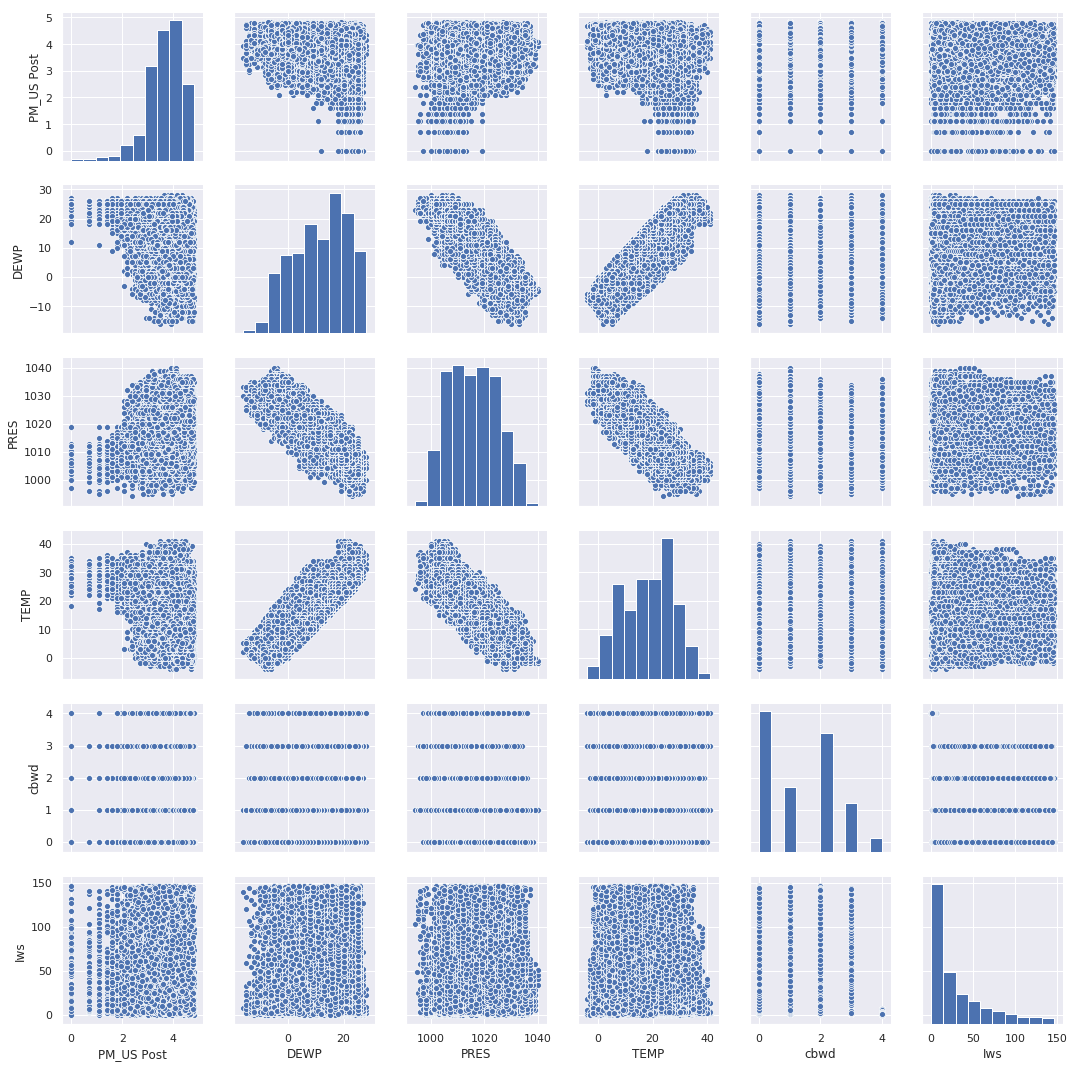

In [131]:
column = pm_df_final.columns
pair_df = pm_df_final[[c for c in columnss if c not in ['Iprec','precipitation','HUMI']]]

sns.pairplot(pair_df)

In [46]:

sparkDF = sparkDF.withColumnRenamed('PM_US Post','label')

In [48]:
sparkDF.show()

+------------------+----+-----+------+----+----+----+
|             label|DEWP| HUMI|  PRES|TEMP|cbwd| Iws|
+------------------+----+-----+------+----+----+----+
|3.5553480614894135| 4.0| 62.0|1027.1|11.0|   0| 8.0|
|3.6888794541139363| 4.0| 62.0|1027.1|11.0|   0| 9.0|
|3.7612001156935624| 5.0|71.07|1028.1|10.0|   0|11.0|
|3.6635616461296463| 5.0|71.07|1028.1|10.0|   0|13.0|
|3.1780538303479458| 6.0|76.18|1028.1|10.0|   0|15.0|
| 3.295836866004329| 6.0|76.18|1028.1|10.0|   0|17.0|
|3.4965075614664802| 6.0|76.18|1028.1|10.0|   0|19.0|
|3.1780538303479458| 5.0|76.01|1028.1| 9.0|   0|21.0|
| 3.258096538021482| 5.0|76.01|1028.1| 9.0|   0|23.0|
|3.5263605246161616| 5.0|81.34|1028.1| 8.0|   0|25.0|
|3.4657359027997265| 5.0|81.34|1027.1| 8.0|   0|29.0|
|3.4965075614664802| 4.0|70.88|1028.1| 9.0|   0|34.0|
|3.5553480614894135| 4.0|70.88|1028.1| 9.0|   0|37.0|
|3.6635616461296463| 4.0|70.88|1029.1| 9.0|   0|40.0|
|3.6888794541139363| 4.0|70.88|1030.1| 9.0|   0|44.0|
|3.6635616461296463| 4.0|66.

In [49]:
from pyspark.ml.feature import VectorAssembler

feature_list = []
for col in sparkDF.columns:
    if col == 'label':
        continue
    else:
        feature_list.append(col)

assembler = VectorAssembler(inputCols=feature_list, outputCol="features")


In [50]:
feature_list

['DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws']

In [51]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(labelCol="label", featuresCol="features")

In [52]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[assembler, rf])

In [53]:
from pyspark.ml.tuning import ParamGridBuilder
import numpy as np

paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]) \
    .addGrid(rf.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]) \
    .build()

In [54]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(),
                          numFolds=5)

In [55]:
train_data,test_data = sparkDF.randomSplit([0.8,0.2])

In [56]:
cvModel = crossval.fit(train_data)
predictions = cvModel.transform(test_data)

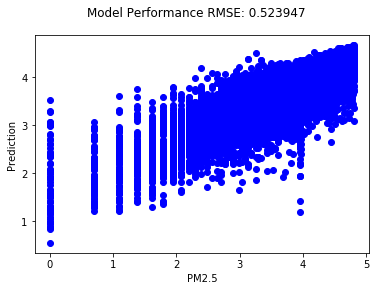

In [62]:
import matplotlib.pyplot as plt

evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions)

rfPred = cvModel.transform(sparkDF)

rfResult = rfPred.toPandas()

plt.plot(rfResult.label, rfResult.prediction, 'bo')
plt.xlabel('PM2.5')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

In [65]:
bestPipeline = cvModel.bestModel
bestModel = bestPipeline.stages[1]

print('numTrees - ', bestModel.getNumTrees)

numTrees -  50


In [67]:
train_data.show()

+----------+----+-----+------+----+----+-----+
|PM_US Post|DEWP| HUMI|  PRES|TEMP|cbwd|  Iws|
+----------+----+-----+------+----+----+-----+
|       0.0|19.0|83.13|1003.1|22.0|   0|  2.0|
|       0.0|20.0|88.45|1006.1|22.0|   2|  3.0|
|       0.0|21.0|88.54|1012.9|23.0|   0| 46.0|
|       0.0|22.0|55.65|1006.1|32.0|   0|102.0|
|       0.0|22.0|69.98|1007.0|28.0|   2| 30.0|
|       0.0|22.0|94.12|1000.0|23.0|   0| 31.0|
|       0.0|22.0|94.12|1001.0|23.0|   1|  2.0|
|       0.0|22.0|94.12|1012.9|23.0|   0| 49.0|
|       0.0|23.0|50.01|1004.1|35.0|   2| 24.0|
|       0.0|23.0|52.86|1002.0|34.0|   2| 14.0|
|       0.0|23.0|52.86|1004.1|34.0|   2|143.0|
|       0.0|23.0|55.89|1002.0|33.0|   2| 51.0|
|       0.0|23.0|59.13|1004.1|32.0|   0| 60.0|
|       0.0|23.0|70.17|1003.0|29.0|   2| 72.0|
|       0.0|23.0|74.35| 997.0|28.0|   1| 10.0|
|       0.0|23.0|74.35|1006.0|28.0|   2| 71.0|
|       0.0|23.0|74.35|1006.0|28.0|   2| 78.0|
|       0.0|23.0|74.35|1010.2|28.0|   0| 56.0|
|       0.0|2

In [160]:
final_data.show(10)

+--------------------+------------------+
|            features|        PM_US Post|
+--------------------+------------------+
|[4.0,62.0,1027.1,...|3.5553480614894135|
|[4.0,62.0,1027.1,...|3.6888794541139363|
|[5.0,71.07,1028.1...|3.7612001156935624|
|[5.0,71.07,1028.1...|3.6635616461296463|
|[6.0,76.18,1028.1...|3.1780538303479458|
|[6.0,76.18,1028.1...| 3.295836866004329|
|[6.0,76.18,1028.1...|3.4965075614664802|
|[5.0,76.01,1028.1...|3.1780538303479458|
|[5.0,76.01,1028.1...| 3.258096538021482|
|[5.0,81.34,1028.1...|3.5263605246161616|
+--------------------+------------------+
only showing top 10 rows

